In [2]:
%matplotlib inline
import math as m; import numpy as np; import matplotlib.pyplot as plt; import matplotlib.colors
import pandas as pd; import os; import pathlib; import string; import datetime

directory = 'C:\\Users\\jacob\\Documents\\Boston University\\Astronomy PhD\\Research\\Wen Li Group\\csp-research\\juno_data\\'

In [3]:
# moon data
sat_list = ['Io', 'Europa', 'Ganymede']
d_eq_VAR = [50, 50, 25]

RG = 0.0377 # Ganymede radius in RJ
RE = 0.0223 # Europa radius in RJ
RI = 0.0261 # Io radius in RJ

R_list = np.array([RI, RE, RG])
R_labels = np.array(['RI', 'RE', 'RG'])

In [4]:
# code for detecting magnetic conjunctions between Juno and Galilean satellites
# read in position data
pos_fields = ['Year', 'Month', 'Date', 'Hour', 'Minute', 'Lon_Juno [degree]', 'Lat_Juno [degree]', 'PosX_Juno [RJ]',\
          'PosY_Juno [RJ]', 'PosZ_Juno [RJ]', 'RJupiter_Juno [RJ]', 'Lon_Io [degree]', 'Lat_Io [degree]', 'PosX_Io [RJ]',\
          'PosY_Io [RJ]', 'PosZ_Io [RJ]', 'RJupiter_Io [RJ]', 'Lon_Europa [degree]', 'Lat_Europa [degree]', \
          'PosX_Europa [RJ]',  'PosY_Europa [RJ]', 'PosZ_Europa [RJ]', 'RJupiter_Europa [RJ]', 'Lon_Ganymede [degree]', \
          'Lat_Ganymede [degree]', 'PosX_Ganymede [RJ]', 'PosY_Ganymede [RJ]', 'PosZ_Ganymede [RJ]', 'RJupiter_Ganymede [RJ]']

# read in Juno M-shell data
ms_file = 'junoMshellJRM33Con2020_v1.0.txt'
ms_fields = ['Year', 'Month', 'Date', 'Hour', 'Minute', 'M-shell']
ms_data = pd.read_csv(directory + ms_file, names = ms_fields, usecols = ms_fields, sep = '\s+', header = 5)

# find Juno_LON and Juno_MSHELL
Juno_MSHELL = ms_data['M-shell'].values

In [5]:
date_list = np.array(['2017-10-24/16:25','2018-07-16/05:53','2018-07-16/06:01',
'2018-12-21/09:14','2018-02-07/06:42','2019-02-12/16:17','2019-07-21/03:42',
'2019-07-21/03:04','2019-11-03/21:50','2019-12-26/02:35','2020-09-16/01:59',
'2020-11-08/01:38','2020-12-30/22:46','2020-04-10/06:06','2020-09-16/01:44',
'2021-11-29/12:50','2021-10-16/09:00','2021-06-07/17:00','2021-07-20/16:40',
'2022-02-25/02:50','2022-04-09/12:10','2022-07-05/05:10','2022-08-17/14:40',
'2022-11-06/22:30','2022-12-14/23:50','2022-02-24/19:10','2022-09-29/09:40',
])
print(date_list)

moon_indices = np.array([1,0,1,1,2,0,0,2,2,2,0,0,0,1,1,0,1,2,2,0,0,0,0,0,0,1,1])

['2017-10-24/16:25' '2018-07-16/05:53' '2018-07-16/06:01'
 '2018-12-21/09:14' '2018-02-07/06:42' '2019-02-12/16:17'
 '2019-07-21/03:42' '2019-07-21/03:04' '2019-11-03/21:50'
 '2019-12-26/02:35' '2020-09-16/01:59' '2020-11-08/01:38'
 '2020-12-30/22:46' '2020-04-10/06:06' '2020-09-16/01:44'
 '2021-11-29/12:50' '2021-10-16/09:00' '2021-06-07/17:00'
 '2021-07-20/16:40' '2022-02-25/02:50' '2022-04-09/12:10'
 '2022-07-05/05:10' '2022-08-17/14:40' '2022-11-06/22:30'
 '2022-12-14/23:50' '2022-02-24/19:10' '2022-09-29/09:40']


In [6]:
Juno_LON_list = np.array([])
Juno_LAT_list = np.array([])

for i in np.arange(len(moon_indices)):
    pos_file = 'jupiterMoonsLocationInfo_'+ date_list[i][0:4] + '_v1.0' + '.txt'
    pos_data = pd.read_csv(directory + pos_file, names = pos_fields, usecols = pos_fields, sep = '\s+', header = 15)
    
    Juno_LON = pos_data['Lon_Juno [degree]'].values
    Juno_LAT = pos_data['Lat_Juno [degree]'].values

    mask = (pos_data['Year'].values == int(date_list[i][0:4])) & \
    (pos_data['Month'].values == int(date_list[i][5:7])) & \
    (pos_data['Date'].values == int(date_list[i][8:10])) & \
    (pos_data['Hour'].values == int(date_list[i][11:13])) & \
    (pos_data['Minute'].values == int(date_list[i][14:16]))
    
    Juno_LON_i = Juno_LON[mask]
    Juno_LAT_i = Juno_LAT[mask]
    print(Juno_LON_i)
    
    Juno_LON_list = np.append(Juno_LON_list, Juno_LON_i)
    Juno_LAT_list = np.append(Juno_LAT_list, Juno_LAT_i)
    
Juno_LON_list

[11.23]
[103.21]
[112.34]
[61.78]
[129.32]
[29.09]
[245.96]
[96.46]
[104.72]
[77.22]
[141.98]
[187.63]
[185.4]
[322.41]
[79.02]
[223.]
[293.09]
[304.5]
[284.28]
[327.55]
[110.35]
[351.23]
[138.41]
[31.26]
[213.3]
[219.91]
[138.18]


array([ 11.23, 103.21, 112.34,  61.78, 129.32,  29.09, 245.96,  96.46,
       104.72,  77.22, 141.98, 187.63, 185.4 , 322.41,  79.02, 223.  ,
       293.09, 304.5 , 284.28, 327.55, 110.35, 351.23, 138.41,  31.26,
       213.3 , 219.91, 138.18])

In [7]:
Juno_MSHELL_list = np.array([])

for i in np.arange(len(moon_indices)):
    mask = (ms_data['Year'].values == int(date_list[i][0:4])) & \
    (ms_data['Month'].values == int(date_list[i][5:7])) & \
    (ms_data['Date'].values == int(date_list[i][8:10])) & \
    (ms_data['Hour'].values == int(date_list[i][11:13])) & \
    (ms_data['Minute'].values == int(date_list[i][14:16]))
    
    Juno_MSHELL_i = Juno_MSHELL[mask]
    
    Juno_MSHELL_list = np.append(Juno_MSHELL_list, Juno_MSHELL_i)

[9.67]
[5.88]
[9.73]
[10.14]
[14.54]
[5.68]
[5.72]
[14.99]
[15.33]
[15.09]
[6.37]
[6.14]
[6.11]
[9.67]
[9.83]
[6.95]
[10.01]
[14.98]
[15.45]
[6.15]
[5.99]
[6.07]
[5.02]
[6.96]
[6.27]
[9.62]
[9.42]


array([ 9.67,  5.88,  9.73, 10.14, 14.54,  5.68,  5.72, 14.99, 15.33,
       15.09,  6.37,  6.14,  6.11,  9.67,  9.83,  6.95, 10.01, 14.98,
       15.45,  6.15,  5.99,  6.07,  5.02,  6.96,  6.27,  9.62,  9.42])

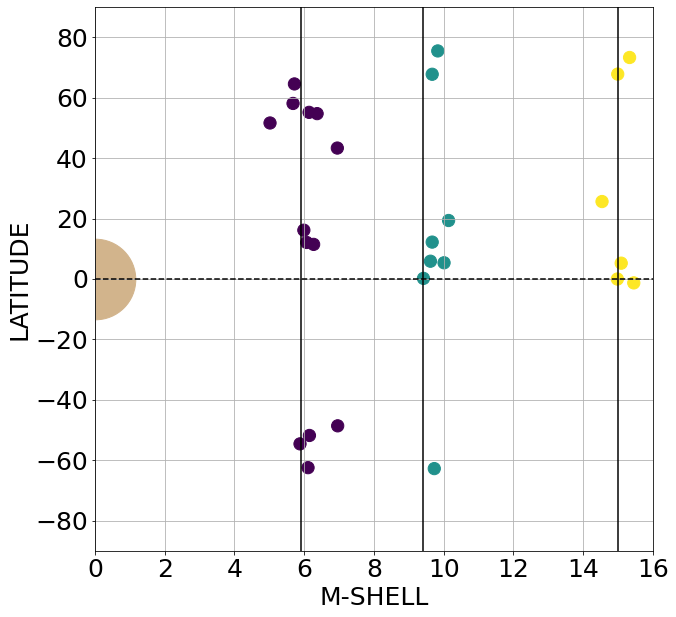

In [8]:
orb = np.array([5.9, 9.4, 15.0])

plt.figure(figsize = (10,10))
plt.scatter(0,0, s=6.5e3, c='tan')
plt.scatter(Juno_MSHELL_list, Juno_LAT_list, s=150, c=moon_indices)
for i in np.arange(len(orb)):
    plt.axvline(orb[i], color='k', linestyle='-')
plt.axhline(color='k', linestyle='--')
plt.xlabel('M-SHELL', fontsize = 25)
plt.ylabel('LATITUDE', fontsize = 25)
plt.xlim(0,16)
plt.ylim(-90,90)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid(True)
#plt.legend()
plt.show()

In [9]:
JUNO_Z_POS = Juno_MSHELL_list * (np.cos(Juno_LAT_list))**2 * np.sin(Juno_LAT_list)
JUNO_X_POS = np.abs(Juno_MSHELL_list * (np.cos(Juno_LAT_list))**3)

LAT_LIST = np.linspace(-90,90,500)

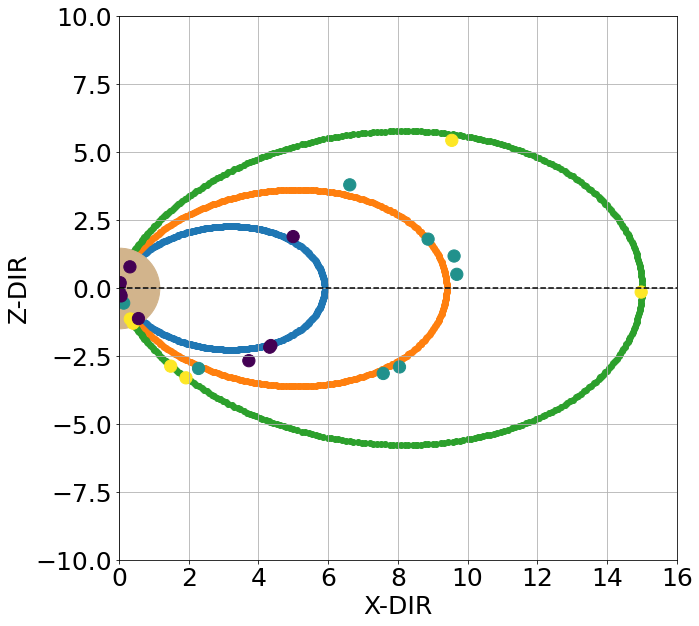

In [11]:
plt.figure(figsize = (10,10))
for i in np.arange(len(orb)):
    M_Z_i = orb[i] * (np.cos(LAT_LIST))**2 * np.sin(LAT_LIST)
    M_X_i = np.abs(orb[i] * (np.cos(LAT_LIST))**3)
    plt.scatter(M_X_i, M_Z_i)
plt.scatter(0,0, s=6.5e3, c='tan')
plt.scatter(JUNO_X_POS, JUNO_Z_POS, s=150, c=moon_indices)
plt.axhline(color='k', linestyle='--')
plt.xlabel('X-DIR', fontsize = 25)
plt.ylabel('Z-DIR', fontsize = 25)
plt.xlim(0,16)
plt.ylim(-10,10)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid(True)
#plt.legend()
plt.show()

In [12]:
for i in np.arange(len(Juno_MSHELL_list)):
    print(f'M:{Juno_MSHELL_list[i]}, Lat: {Juno_LAT_list[i]}, Lon:{Juno_LON_list[i]}')

M:9.67, Lat: 67.79, Lon:11.23
M:5.88, Lat: -54.59, Lon:103.21
M:9.73, Lat: -62.78, Lon:112.34
M:10.14, Lat: 19.37, Lon:61.78
M:14.54, Lat: 25.65, Lon:129.32
M:5.68, Lat: 58.13, Lon:29.09
M:5.72, Lat: 64.59, Lon:245.96
M:14.99, Lat: 67.85, Lon:96.46
M:15.33, Lat: 73.35, Lon:104.72
M:15.09, Lat: 5.24, Lon:77.22
M:6.37, Lat: 54.76, Lon:141.98
M:6.14, Lat: 55.18, Lon:187.63
M:6.11, Lat: -62.47, Lon:185.4
M:9.67, Lat: 12.22, Lon:322.41
M:9.83, Lat: 75.52, Lon:79.02
M:6.95, Lat: 43.36, Lon:223.0
M:10.01, Lat: 5.37, Lon:293.09
M:14.98, Lat: -0.01, Lon:304.5
M:15.45, Lat: -1.29, Lon:284.28
M:6.15, Lat: -51.81, Lon:327.55
M:5.99, Lat: 16.16, Lon:110.35
M:6.07, Lat: 12.1, Lon:351.23
M:5.02, Lat: 51.66, Lon:138.41
M:6.96, Lat: -48.62, Lon:31.26
M:6.27, Lat: 11.46, Lon:213.3
M:9.62, Lat: 5.89, Lon:219.91
M:9.42, Lat: 0.2, Lon:138.18
